<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula04a_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [77]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(data['data'], data['target'], random_state=42)
print(Xtr.shape, Xte.shape, ytr.shape, yte.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


In [78]:
Xtr2 = Xtr[:, 2:3]
Xtr2.shape

(15480, 1)

[0.33019903]
1.3266075107460107


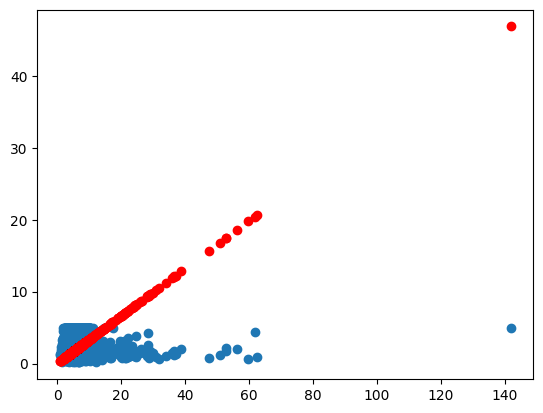

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

class LinearRegression:
    def __init__(self):
        self.learning_rate = 0.000001

    def fit(self, X, y):
        self.w = np.random.rand(X.shape[1])
        for _ in range(20):
            ypred = X @ self.w
            error = y - ypred
            self.w += self.learning_rate * X.T @ error
        print(self.w)
        return self

    def predict(self, X):
        return X @ self.w

model = LinearRegression()
model.fit(Xtr2, ytr)
ypred = model.predict(Xtr2)
print(root_mean_squared_error(ytr, ypred))
plt.scatter(Xtr2, ytr)
plt.scatter(Xtr2, ypred, c='r')
plt.show()

[1.56163197 0.09055142]
1.1415886919642197


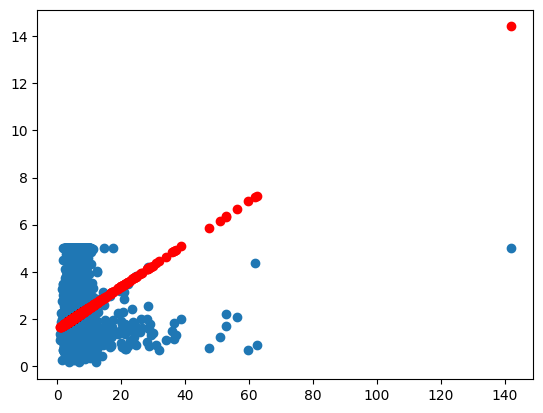

In [80]:
def include_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.concatenate((bias, X), axis=1)

class LinearRegression:
    def __init__(self, max_iter=100, learning_rate=0.000001):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        X = include_bias(X)
        self.w = np.random.rand(X.shape[1])
        for _ in range(self.max_iter):
            ypred = X @ self.w
            error = y - ypred
            self.w += self.learning_rate * X.T @ error
        print(self.w)
        return self

    def predict(self, X):
        X = include_bias(X)
        return X @ self.w

model = LinearRegression(1000)
model.fit(Xtr2, ytr)
ypred = model.predict(Xtr2)
print(root_mean_squared_error(ytr, ypred))
plt.scatter(Xtr2, ytr)
plt.scatter(Xtr2, ypred, c='r')
plt.show()

[0.09165307] [1.5544882]
1.141698197911705


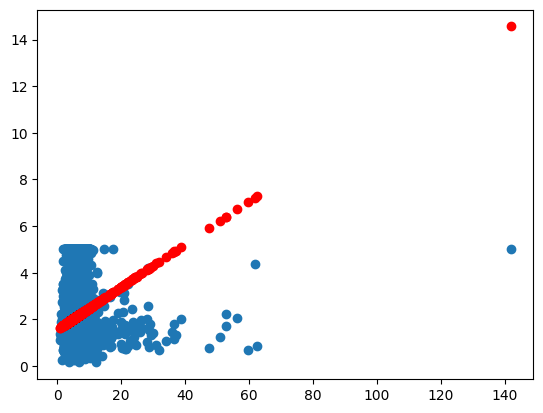

In [81]:
class LinearRegression:
    def __init__(self, max_iter=100, learning_rate=10e-7):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def fit(self, X, y):
        self.w = np.random.rand(X.shape[1])
        self.b = np.random.rand(1)
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            error = y - ypred
            self.w += self.learning_rate * X.T @ error
            self.b += self.learning_rate * np.sum(error)
        print(self.w, self.b)
        return self

    def predict(self, X):
        return X @ self.w + self.b

model = LinearRegression(1000)
model.fit(Xtr2, ytr)
ypred = model.predict(Xtr2)
print(root_mean_squared_error(ytr, ypred))
plt.scatter(Xtr2, ytr)
plt.scatter(Xtr2, ypred, c='r')
plt.show()

In [82]:
model = LinearRegression(int(10e4), 10e-12)
model.fit(Xtr, ytr)
ypred = model.predict(Xtr)
print(root_mean_squared_error(ytr, ypred))

[7.20686863e-01 5.02126883e-02 6.30814121e-01 7.16889036e-01
 2.80148197e-04 6.88672777e-02 5.37045897e-01 2.20645933e-01] [0.23562373]
2.562811822726755


In [83]:
mean_tr = np.mean(Xtr, axis=0)
std_tr = np.std(Xtr, axis=0)
Xtr_norm = (Xtr - mean_tr) / std_tr
Xte_norm = (Xte - mean_tr) / std_tr

In [88]:
model = LinearRegression(2000)
model.fit(Xtr_norm, ytr)
ypred = model.predict(Xtr_norm)
print(root_mean_squared_error(ytr, ypred))

[ 0.90101773  0.14560778 -0.3637968   0.38542215  0.00662826 -0.04479423
 -0.66440565 -0.64344268] [2.07034892]
0.7255685770890437


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtr)
Xtr_norm = scaler.transform(Xtr)
Xte_norm = scaler.transform(Xte)

model = LinearRegression(2000)
model.fit(Xtr_norm, ytr)
ypred = model.predict(Xtr_norm)
print(root_mean_squared_error(ytr, ypred))

[ 0.88993927  0.14100472 -0.34788959  0.37456314  0.00511503 -0.0440684
 -0.70825316 -0.68620778] [2.07034892]
0.7241635457690139


In [91]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtr_norm, ytr)
ypred = model.predict(Xtr_norm)
print(root_mean_squared_error(ytr, ypred))

0.7214930466501481
